<a href="https://www.kaggle.com/code/kahokaya/model-from-scratch?scriptVersionId=156300185" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
import pandas as pd, numpy as np

In [2]:
df=pd.read_csv("/kaggle/input/titanic/train.csv") 
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [3]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [4]:
# her sütunun en çok tekrar eden değeri yazdırdık yani modunu bulduk. iloc kullandık cunku mode en cok tekrar edenlerı ılk satıra toplamıs.
modes = df.mode().iloc[0]
df1=pd.DataFrame(modes)
df1

,0
PassengerId,1
Survived,0.0
Pclass,3.0
Name,"Abbing, Mr. Anthony"
Sex,male
Age,24.0
SibSp,0.0
Parch,0.0
Ticket,1601
Fare,8.05


In [5]:
# her sütunun en çok tekrar eden değeri yazdırdık yani modunu bulduk. iloc kullandık cunku mode en cok tekrar edenlerı ılk satıra toplamıs.
modes = df.mode().iloc[0]
modes

PassengerId                      1
Survived                       0.0
Pclass                         3.0
Name           Abbing, Mr. Anthony
Sex                           male
Age                           24.0
SibSp                          0.0
Parch                          0.0
Ticket                        1601
Fare                          8.05
Cabin                      B96 B98
Embarked                         S
Name: 0, dtype: object

In [6]:
j1=[n for n in df.columns]
j2=[]
for m in range(len(modes)):
    j2.append(modes[m])
j3=pd.DataFrame(j1,columns=["column"])
j4=pd.DataFrame(j2,columns=["mod"])
dff=pd.concat([j3,j4],axis=1)
dff

/tmp/ipykernel_26/2174289697.py:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  j2.append(modes[m])


,column,mod
0,PassengerId,1
1,Survived,0.0
2,Pclass,3.0
3,Name,"Abbing, Mr. Anthony"
4,Sex,male
5,Age,24.0
6,SibSp,0.0
7,Parch,0.0
8,Ticket,1601
9,Fare,8.05


**boş değerleri mod değerleri ile doldurmuş oldum. görüldüğü üzere yeni df datamızda boş değer yok.
**

In [7]:
i=0
for c in dff.column:
    df[c].fillna(dff["mod"][i],inplace=True)
    i+=1
    
df.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [8]:
#yukarda yaptıklarımı yapmadan da bu şekilde kısaca yapabilirsiniz ama kendimi geliştirmek için öyle yaptım
df.fillna(modes,inplace=True)
df.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

**burda object sectıgım ıcın kategorık degıskenlerde gosterilir.
**

In [9]:
print(df.describe(include=[object]).T)

         count unique                      top freq
Name       891    891  Braund, Mr. Owen Harris    1
Sex        891      2                     male  577
Ticket     891    681                   347082    7
Cabin      891    147                  B96 B98  691
Embarked   891      3                        S  646


**sadece numeric degerler gosterılır**

In [10]:
df.describe(include=(np.number)).T

,count,mean,std,min,25%,50%,75%,max
PassengerId,891.0,446.000000,257.353842,1.00,223.5000,446.0000,668.5,891.0000
Survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
Pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
Age,891.0,28.566970,13.199572,0.42,22.0000,24.0000,35.0,80.0000
SibSp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
Parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


**her ne kadar odenen para(Fare) ortalaması 32 olsada ortalama degerlerden bazen uzak degerler olabılrı burda mesela 
cok az deger 200-300 arasın da ıken dıgerlerı 0-100 arasında toplanmıs.
**

<Axes: >

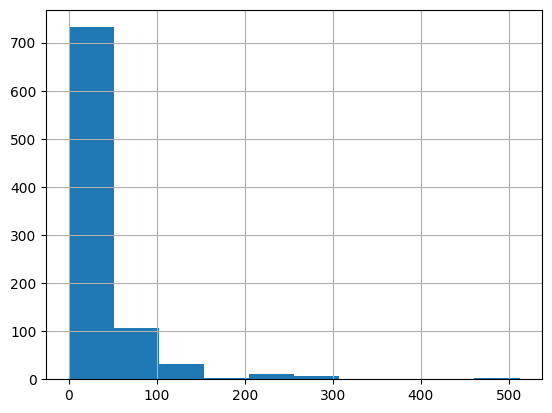

In [11]:
df["Fare"].hist()

**aykırı degerlerden kurtulmak ıcın logarıtmık yontemı kullandık.**

<Axes: >

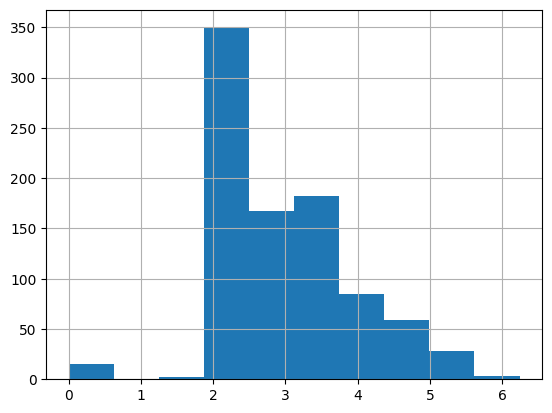

In [12]:
df["Fare"]=np.log(df["Fare"]+1)
df["Fare"].hist()

kategorik değişkenleri numerik yaptık

In [13]:
df = pd.get_dummies(df, columns=["Sex","Pclass","Embarked"],dtype=int)
df.columns

Index(['PassengerId', 'Survived', 'Name', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Cabin', 'Sex_female', 'Sex_male', 'Pclass_1', 'Pclass_2',
       'Pclass_3', 'Embarked_C', 'Embarked_Q', 'Embarked_S'],
      dtype='object')

In [14]:
added_cols = ['Sex_male', 'Sex_female', 'Pclass_1', 'Pclass_2', 'Pclass_3', 'Embarked_C', 'Embarked_Q', 'Embarked_S']
df.head()

,PassengerId,Survived,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Sex_female,Sex_male,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S
0,1,0,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,2.110213,B96 B98,0,1,0,0,1,0,0,1
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,4.280593,C85,1,0,1,0,0,1,0,0
2,3,1,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,2.188856,B96 B98,1,0,0,0,1,0,0,1
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,3.990834,C123,1,0,1,0,0,0,0,1
4,5,0,"Allen, Mr. William Henry",35.0,0,0,373450,2.202765,B96 B98,0,1,0,0,1,0,0,1


**bagımlı degıskenlerımızı tensore atalım**

In [15]:
import torch
from torch import tensor

t_dep = tensor(df.Survived)
t_dep

tensor([0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1,
        0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1,
        0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0,
        0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
        0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,
        0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0,
        0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0,
        1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1,
        1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0,
        0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0,
        0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0,
        1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1,

**bagımsız degıskenlerımızı tensore atalım**

In [16]:
indep_cols = ['Age', 'SibSp', 'Parch', 'Fare'] + added_cols

t_indep = tensor(df[indep_cols].values, dtype=torch.float)
t_indep

tensor([[22.,  1.,  0.,  ...,  0.,  0.,  1.],
        [38.,  1.,  0.,  ...,  1.,  0.,  0.],
        [26.,  0.,  0.,  ...,  0.,  0.,  1.],
        ...,
        [24.,  1.,  2.,  ...,  0.,  0.,  1.],
        [26.,  0.,  0.,  ...,  1.,  0.,  0.],
        [32.,  0.,  0.,  ...,  0.,  1.,  0.]])

**bagımsız degısken tensorlerımızın seklıne bakalım ve 12 tane sutunlu oldugundan demekkı bunlarla carpılacak katsayıların sayısıda 12 tane olmalıdır.**

In [17]:
t_indep.shape

torch.Size([891, 12])

**gradient baslangıcı ıcın bır tamamen rasgele 12 tane elemandan olusan bır vektor yaptık**

In [18]:
random_numbers_01 = torch.rand(12)
katsayilar = (random_numbers_01 - 0.5) 
katsayilar

tensor([-0.0607, -0.1032, -0.0250, -0.0709, -0.2568,  0.0679, -0.4602,  0.2219,
        -0.1284,  0.1173,  0.1616, -0.4390])

**bu sekılde pytorch ıle bır normlızasyon yaptık cunku Age bır aykırı deger olarak davranıyordu.**

In [19]:
vals,indices = t_indep.max(dim=0)
t_indep = t_indep / vals
t_indep

tensor([[0.2750, 0.1250, 0.0000,  ..., 0.0000, 0.0000, 1.0000],
        [0.4750, 0.1250, 0.0000,  ..., 1.0000, 0.0000, 0.0000],
        [0.3250, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 1.0000],
        ...,
        [0.3000, 0.1250, 0.3333,  ..., 0.0000, 0.0000, 1.0000],
        [0.3250, 0.0000, 0.0000,  ..., 1.0000, 0.0000, 0.0000],
        [0.4000, 0.0000, 0.0000,  ..., 0.0000, 1.0000, 0.0000]])

**katsayılarımı bagımsız degıskenler ıle dolu tensorumuzle carpalım
**

In [20]:
katsayilar*t_indep

tensor([[-0.0167, -0.0129, -0.0000,  ...,  0.0000,  0.0000, -0.4390],
        [-0.0288, -0.0129, -0.0000,  ...,  0.1173,  0.0000, -0.0000],
        [-0.0197, -0.0000, -0.0000,  ...,  0.0000,  0.0000, -0.4390],
        ...,
        [-0.0182, -0.0129, -0.0083,  ...,  0.0000,  0.0000, -0.4390],
        [-0.0197, -0.0000, -0.0000,  ...,  0.1173,  0.0000, -0.0000],
        [-0.0243, -0.0000, -0.0000,  ...,  0.0000,  0.1616, -0.0000]])

**sum() burada carpım sonucu olan tensordekı her satırı tek tek toplar ve bu bızım ıcın 891 tane tahmın degerı olur.**

In [21]:
def cal_preds(katsayilar,t_indep):
    preds = (t_indep*katsayilar).sum(axis=1)
    return preds

In [22]:
def fx(katsayilar, t_indep):
    preds = (t_indep*katsayilar).sum(axis=1)
    return preds

In [23]:
preds=fx(katsayilar, t_indep,)
preds

tensor([-8.7776e-01, -3.6538e-01, -5.4413e-01, -9.1620e-01, -8.7577e-01,
        -2.6727e-01, -1.2421e+00, -9.0374e-01, -5.5672e-01,  3.4453e-01,
        -5.5230e-01, -9.1307e-01, -8.6439e-01, -9.2699e-01, -5.3494e-01,
        -2.2319e-01, -3.1952e-01, -5.2213e-01, -5.6941e-01,  1.4694e-02,
        -5.3793e-01, -5.2971e-01,  6.4733e-02, -1.2182e+00, -5.8364e-01,
        -6.0162e-01, -3.0996e-01, -1.2809e+00,  5.8098e-02, -8.6723e-01,
        -6.6817e-01, -3.6287e-01,  5.8265e-02, -5.5174e-01, -6.8405e-01,
        -1.2459e+00, -3.0997e-01, -8.6515e-01, -5.7245e-01,  4.8596e-03,
        -5.6947e-01, -2.1779e-01, -3.1085e-01,  3.4095e-01,  6.1890e-02,
        -8.6743e-01, -2.8650e-01,  5.8265e-02, -3.4728e-01, -5.5943e-01,
        -9.2738e-01, -8.6483e-01, -3.7455e-01, -2.2163e-01, -7.0022e-01,
        -1.2151e+00, -1.9297e-01, -3.1338e-01, -2.1248e-01, -9.4934e-01,
        -3.0845e-01, -9.1016e-01, -1.2535e+00, -9.1249e-01, -6.5604e-01,
        -3.3476e-01, -1.9903e-01, -8.6377e-01, -5.9

In [24]:
def cal_loss(katsayilar, t_indep):
    preds=fx(katsayilar, t_indep)
    return torch.abs(t_dep-preds).mean()

In [25]:
katsayilar.requires_grad_()

tensor([-0.0607, -0.1032, -0.0250, -0.0709, -0.2568,  0.0679, -0.4602,  0.2219,
        -0.1284,  0.1173,  0.1616, -0.4390], requires_grad=True)

In [26]:
loss=cal_loss(katsayilar, t_indep)
loss

tensor(1.0100, grad_fn=<MeanBackward0>)

In [27]:
loss.backward()

In [28]:
katsayilar.grad

tensor([-0.3414, -0.0634, -0.0595, -0.4542, -0.6296, -0.3232, -0.2424, -0.1886,
        -0.5219, -0.1639, -0.0640, -0.7250])

In [29]:
loss = cal_loss(katsayilar, t_indep)
loss.backward()
katsayilar.grad

tensor([-0.6829, -0.1268, -0.1190, -0.9085, -1.2593, -0.6465, -0.4848, -0.3771,
        -1.0438, -0.3277, -0.1279, -1.4501])

In [30]:
loss = cal_loss(katsayilar, t_indep)
loss.backward()
with torch.no_grad():
    katsayilar.sub_(katsayilar.grad * 0.1)
    katsayilar.grad.zero_()
    print(cal_loss(katsayilar, t_indep))

tensor(0.5242)


In [31]:
from fastai.data.transforms import RandomSplitter
trn_split,val_split=RandomSplitter(seed=42)(df)

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


**trn_split ve val_split rasgele bir index listesi dondurur.**

In [32]:
trn_split

(#713) [788,525,821,253,374,98,215,313,281,305...]

In [33]:
trn_indep,val_indep = t_indep[trn_split],t_indep[val_split]
trn_dep,val_dep = t_dep[trn_split],t_dep[val_split]
len(trn_indep),len(trn_indep),trn_indep,val_indep

(713,
 713,
 tensor([[0.0125, 0.1250, 0.3333,  ..., 0.0000, 0.0000, 1.0000],
         [0.5063, 0.0000, 0.0000,  ..., 0.0000, 1.0000, 0.0000],
         [0.3375, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 1.0000],
         ...,
         [0.3000, 0.0000, 0.0000,  ..., 0.0000, 1.0000, 0.0000],
         [0.2125, 0.1250, 0.1667,  ..., 1.0000, 0.0000, 0.0000],
         [0.4500, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 1.0000]]),
 tensor([[0.3000, 0.0000, 0.0000,  ..., 0.0000, 1.0000, 0.0000],
         [0.3000, 0.0000, 0.0000,  ..., 0.0000, 1.0000, 0.0000],
         [0.3000, 0.0000, 0.0000,  ..., 1.0000, 0.0000, 0.0000],
         ...,
         [0.4500, 0.0000, 0.3333,  ..., 0.0000, 0.0000, 1.0000],
         [0.3000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 1.0000],
         [0.1125, 0.1250, 0.1667,  ..., 0.0000, 0.0000, 1.0000]]))

sub_  iki tensoru birbirinden çıkarmaya çalışır.

In [34]:
def update_coeffs(katsayilar, lr):
    katsayilar.sub_(katsayilar.grad * lr)
    katsayilar.grad.zero_()

In [35]:
def one_epoch(katsayilar, lr):
    loss = cal_loss(katsayilar, t_indep)
    loss.backward()
    with torch.no_grad(): update_coeffs(katsayilar, lr)
    print(f"loss: {loss:.3f}", end="; ")

In [36]:
n_coeff = t_indep.shape[1]
n_coeff

12

In [37]:
def init_coeffs(): return (torch.rand(n_coeff)-0.5).requires_grad_()

In [38]:
def train_model(epochs=200, lr=0.05):
    torch.manual_seed(442)
    katsayilar = init_coeffs()
    for i in range(epochs): one_epoch(katsayilar, lr=lr)
    return katsayilar

In [39]:
loss = train_model(200, lr=0.05)
loss

loss: 0.538; loss: 0.529; loss: 0.520; loss: 0.512; loss: 0.505; loss: 0.498; loss: 0.491; loss: 0.485; loss: 0.479; loss: 0.473; loss: 0.467; loss: 0.461; loss: 0.455; loss: 0.450; loss: 0.444; loss: 0.438; loss: 0.433; loss: 0.427; loss: 0.422; loss: 0.416; loss: 0.411; loss: 0.405; loss: 0.400; loss: 0.394; loss: 0.389; loss: 0.384; loss: 0.379; loss: 0.373; loss: 0.368; loss: 0.363; loss: 0.359; loss: 0.354; loss: 0.350; loss: 0.346; loss: 0.343; loss: 0.339; loss: 0.336; loss: 0.333; loss: 0.330; loss: 0.326; loss: 0.323; loss: 0.321; loss: 0.318; loss: 0.315; loss: 0.313; loss: 0.310; loss: 0.308; loss: 0.306; loss: 0.303; loss: 0.301; loss: 0.300; loss: 0.298; loss: 0.296; loss: 0.294; loss: 0.293; loss: 0.291; loss: 0.290; loss: 0.288; loss: 0.287; loss: 0.285; loss: 0.284; loss: 0.282; loss: 0.281; loss: 0.280; loss: 0.279; loss: 0.277; loss: 0.276; loss: 0.274; loss: 0.273; loss: 0.272; loss: 0.271; loss: 0.269; loss: 0.268; loss: 0.267; loss: 0.266; loss: 0.265; loss: 0.264;

tensor([-0.0970, -0.0470,  0.0865, -0.0621, -0.5829,  0.3796,  0.5171,  0.4853,
         0.4533,  0.1720,  0.1807,  0.1557], requires_grad=True)

In [40]:
def show_coeffs(): return dict(zip(indep_cols, katsayilar.requires_grad_(False)))
show_coeffs()

{'Age': tensor(0.0418),
 'SibSp': tensor(-0.0842),
 'Parch': tensor(-0.0072),
 'Fare': tensor(0.0654),
 'Sex_male': tensor(-0.0679),
 'Sex_female': tensor(0.1648),
 'Pclass_1': tensor(-0.3875),
 'Pclass_2': tensor(0.2784),
 'Pclass_3': tensor(0.0282),
 'Embarked_C': tensor(0.1665),
 'Embarked_Q': tensor(0.1808),
 'Embarked_S': tensor(-0.2215)}

In [41]:
preds = cal_preds(katsayilar, val_indep)
preds

tensor([ 0.6638,  0.1763,  0.1614,  0.0436,  0.0297,  0.0286,  0.3884,  0.2640,
        -0.2752,  0.3933, -0.2216,  0.1568, -0.2447,  0.4092, -0.2224, -0.6187,
        -0.6083,  0.2681,  0.0439,  0.0115, -0.2258, -0.6130,  0.0019,  0.2778,
        -0.2290,  0.1769, -0.0136, -0.6098, -0.2286,  0.4091,  0.2564, -0.0346,
        -0.2284, -0.2222,  0.6669, -0.0355, -0.6152,  0.0009, -0.2256, -0.0030,
         0.0245, -0.2256,  0.0402,  0.0061, -0.2277,  0.0257, -0.2052, -0.2431,
         0.1753,  0.0051, -0.2254, -0.2710, -0.2646, -0.2263,  0.0282,  0.0313,
         0.1763, -0.2236, -0.2272, -0.2166, -0.2381, -0.2410, -0.5992, -0.2273,
         0.2687, -0.6215,  0.0292, -0.2071,  0.1796,  0.2733, -0.2248,  0.3989,
         0.0308, -0.2241, -0.6299, -0.2301, -0.2256, -0.6204,  0.0266,  0.0426,
         0.0059, -0.0103, -0.2263, -0.2266,  0.2734,  0.4165, -0.2408, -0.3996,
         0.6476,  0.0287, -0.2211, -0.2256,  0.0085,  0.1645,  0.3692,  0.4234,
         0.0476,  0.3987,  0.4080,  0.17

In [42]:
results = val_dep.bool()==(preds>0.5)
results[:16]

tensor([ True,  True,  True,  True,  True,  True, False, False,  True, False,
        False, False, False, False,  True, False])

In [43]:
results.float().mean()

tensor(0.6124)

In [44]:
def acc(katsayilar): return (val_dep.bool()==(cal_preds(katsayilar, val_indep)>0.5)).float().mean()
acc(katsayilar)

tensor(0.6124)

**baktığımız zaman tahminlerimiz de negatif değerler var. işte bu değerlerin hepsini 0-1 arasına sıkıştırmak için kullanıyoruz sigmoidi.**

In [45]:
preds

tensor([ 0.6638,  0.1763,  0.1614,  0.0436,  0.0297,  0.0286,  0.3884,  0.2640,
        -0.2752,  0.3933, -0.2216,  0.1568, -0.2447,  0.4092, -0.2224, -0.6187,
        -0.6083,  0.2681,  0.0439,  0.0115, -0.2258, -0.6130,  0.0019,  0.2778,
        -0.2290,  0.1769, -0.0136, -0.6098, -0.2286,  0.4091,  0.2564, -0.0346,
        -0.2284, -0.2222,  0.6669, -0.0355, -0.6152,  0.0009, -0.2256, -0.0030,
         0.0245, -0.2256,  0.0402,  0.0061, -0.2277,  0.0257, -0.2052, -0.2431,
         0.1753,  0.0051, -0.2254, -0.2710, -0.2646, -0.2263,  0.0282,  0.0313,
         0.1763, -0.2236, -0.2272, -0.2166, -0.2381, -0.2410, -0.5992, -0.2273,
         0.2687, -0.6215,  0.0292, -0.2071,  0.1796,  0.2733, -0.2248,  0.3989,
         0.0308, -0.2241, -0.6299, -0.2301, -0.2256, -0.6204,  0.0266,  0.0426,
         0.0059, -0.0103, -0.2263, -0.2266,  0.2734,  0.4165, -0.2408, -0.3996,
         0.6476,  0.0287, -0.2211, -0.2256,  0.0085,  0.1645,  0.3692,  0.4234,
         0.0476,  0.3987,  0.4080,  0.17

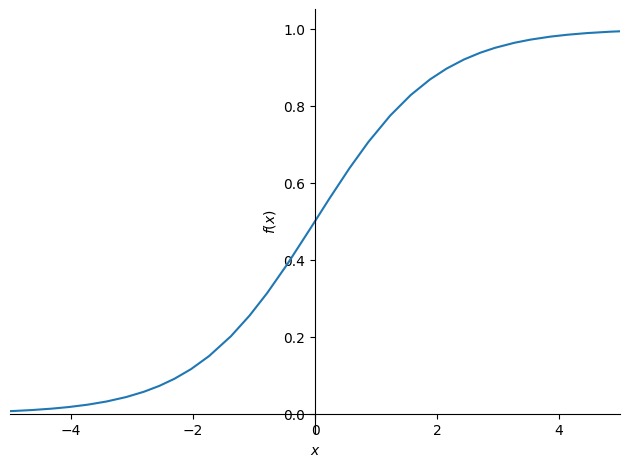

In [46]:
import sympy
sympy.plot("1/(1+exp(-x))", xlim=(-5,5));

pytorchda sigmoid uygulanması.

In [47]:
def cal_preds(katsayilar, t_indep): return torch.sigmoid((t_indep*katsayilar).sum(axis=1))
cal_preds(katsayilar, t_indep)

tensor([0.4407, 0.4995, 0.5020, 0.4026, 0.4452, 0.5442, 0.3527, 0.4352, 0.5023,
        0.6553, 0.4980, 0.4063, 0.4433, 0.4450, 0.5004, 0.5696, 0.5336, 0.5073,
        0.5020, 0.5973, 0.5105, 0.5086, 0.5998, 0.3487, 0.4938, 0.5028, 0.5403,
        0.3447, 0.6009, 0.4438, 0.4420, 0.4995, 0.6009, 0.5123, 0.4407, 0.3489,
        0.5403, 0.4434, 0.4977, 0.5945, 0.5016, 0.5641, 0.5405, 0.6542, 0.6003,
        0.4438, 0.5430, 0.6009, 0.5377, 0.5003, 0.4349, 0.4434, 0.5011, 0.5649,
        0.4470, 0.3483, 0.5642, 0.5408, 0.5613, 0.4329, 0.5400, 0.4065, 0.3503,
        0.4359, 0.4400, 0.5391, 0.5652, 0.4432, 0.4897, 0.4391, 0.5078, 0.4913,
        0.5113, 0.5395, 0.4496, 0.4438, 0.4438, 0.4438, 0.5057, 0.5036, 0.4438,
        0.4449, 0.6009, 0.3494, 0.5637, 0.4967, 0.4428, 0.4438, 0.3995, 0.4438,
        0.4445, 0.4433, 0.3497, 0.4431, 0.4481, 0.4438, 0.4466, 0.4416, 0.5675,
        0.5077, 0.5023, 0.4438, 0.3494, 0.4452, 0.4403, 0.4443, 0.5013, 0.4437,
        0.4456, 0.6010, 0.3519, 0.5951, 

In [48]:
katsayilar = train_model(100)
katsayilar

loss: 0.538; loss: 0.529; loss: 0.520; loss: 0.512; loss: 0.505; loss: 0.498; loss: 0.491; loss: 0.485; loss: 0.479; loss: 0.473; loss: 0.467; loss: 0.461; loss: 0.455; loss: 0.450; loss: 0.444; loss: 0.438; loss: 0.433; loss: 0.427; loss: 0.422; loss: 0.416; loss: 0.411; loss: 0.405; loss: 0.400; loss: 0.394; loss: 0.389; loss: 0.384; loss: 0.379; loss: 0.373; loss: 0.368; loss: 0.363; loss: 0.359; loss: 0.354; loss: 0.350; loss: 0.346; loss: 0.343; loss: 0.339; loss: 0.336; loss: 0.333; loss: 0.330; loss: 0.326; loss: 0.323; loss: 0.321; loss: 0.318; loss: 0.315; loss: 0.313; loss: 0.310; loss: 0.308; loss: 0.306; loss: 0.303; loss: 0.301; loss: 0.300; loss: 0.298; loss: 0.296; loss: 0.294; loss: 0.293; loss: 0.291; loss: 0.290; loss: 0.288; loss: 0.287; loss: 0.285; loss: 0.284; loss: 0.282; loss: 0.281; loss: 0.280; loss: 0.279; loss: 0.277; loss: 0.276; loss: 0.274; loss: 0.273; loss: 0.272; loss: 0.271; loss: 0.269; loss: 0.268; loss: 0.267; loss: 0.266; loss: 0.265; loss: 0.264;

tensor([-0.2301,  0.0503,  0.2107, -0.0143, -0.4921,  0.3060,  0.6312,  0.4463,
         0.3955,  0.1575,  0.2100,  0.1581], requires_grad=True)

In [49]:
acc(katsayilar)

tensor(0.6067)

In [50]:
show_coeffs()

{'Age': tensor(-0.2301),
 'SibSp': tensor(0.0503),
 'Parch': tensor(0.2107),
 'Fare': tensor(-0.0143),
 'Sex_male': tensor(-0.4921),
 'Sex_female': tensor(0.3060),
 'Pclass_1': tensor(0.6312),
 'Pclass_2': tensor(0.4463),
 'Pclass_3': tensor(0.3955),
 'Embarked_C': tensor(0.1575),
 'Embarked_Q': tensor(0.2100),
 'Embarked_S': tensor(0.1581)}

In [51]:
tst_df = pd.read_csv("/kaggle/input/titanic/test.csv")

In [52]:
tst_df['Fare'] = tst_df.Fare.fillna(0)

In [53]:
print(tst_df.columns.tolist())

['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked']


In [54]:
tst_df.fillna(modes, inplace=True)
tst_df['Fare'] = np.log(tst_df['Fare']+1)

In [55]:
tst_df = pd.get_dummies(tst_df, columns=["Sex","Pclass","Embarked"])

In [56]:
tst_indep = torch.tensor(tst_df[indep_cols].values.astype(np.float32), dtype=torch.float)
valss, indices = tst_indep.max(dim=0)
tst_indep = tst_indep / valss


In [57]:
tst_df['Survived'] = (cal_preds(tst_indep, katsayilar)>0.5).int()
tst_df['Survived'] 

0      1
1      1
2      0
3      0
4      1
      ..
413    0
414    1
415    0
416    0
417    1
Name: Survived, Length: 418, dtype: int32

In [58]:
sub_df = tst_df[['PassengerId','Survived']]
sub_df.to_csv('sub.csv', index=False)

In [59]:
!head sub.csv

PassengerId,Survived
892,1
893,1
894,0
895,0
896,1
897,1
898,1
899,1
900,1
